In [46]:
# importing modules
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

loans = pd.read_csv(r"C:\Users\arnuv\Downloads\Loans_Dataset.csv")
print(loans.head(10),"\n\n\n\n")
loans.info()


   initial_payment  last_payment  credit_score  house_number    sum result
0              201         10018           250          3046  13515    yes
1              205         10016           395          3044  13660    yes
2              257         10129           109          3251  13746    yes
3              246         10064           324          3137  13771    yes
4              117         10115           496          3094  13822    yes
5              406         10187           166          3068  13827    yes
6              461         10252           172          3062  13947    yes
7              158         10192           144          3469  13963    yes
8              136         10376           230          3223  13965    yes
9              194         10092           626          3083  13995    yes 




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------        

result
No     521
yes    483
Name: count, dtype: int64


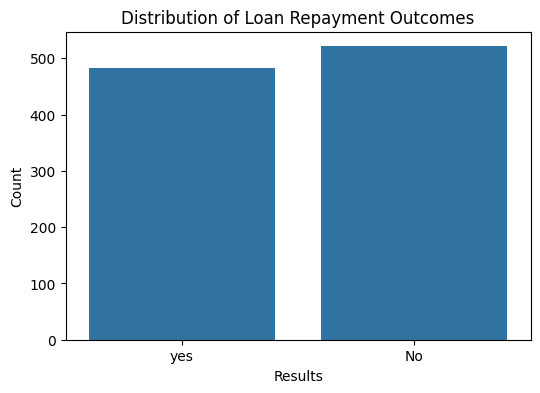

In [49]:
# distribution of the target variable
print(loans['result'].value_counts())

# plot of the distribution of the target variable
plt.figure(figsize = (6,4))
sb.countplot(x='result', data=loans)
plt.title('Distribution of Loan Repayment Outcomes')
plt.xlabel('Results')
plt.ylabel('Count')
plt.show()


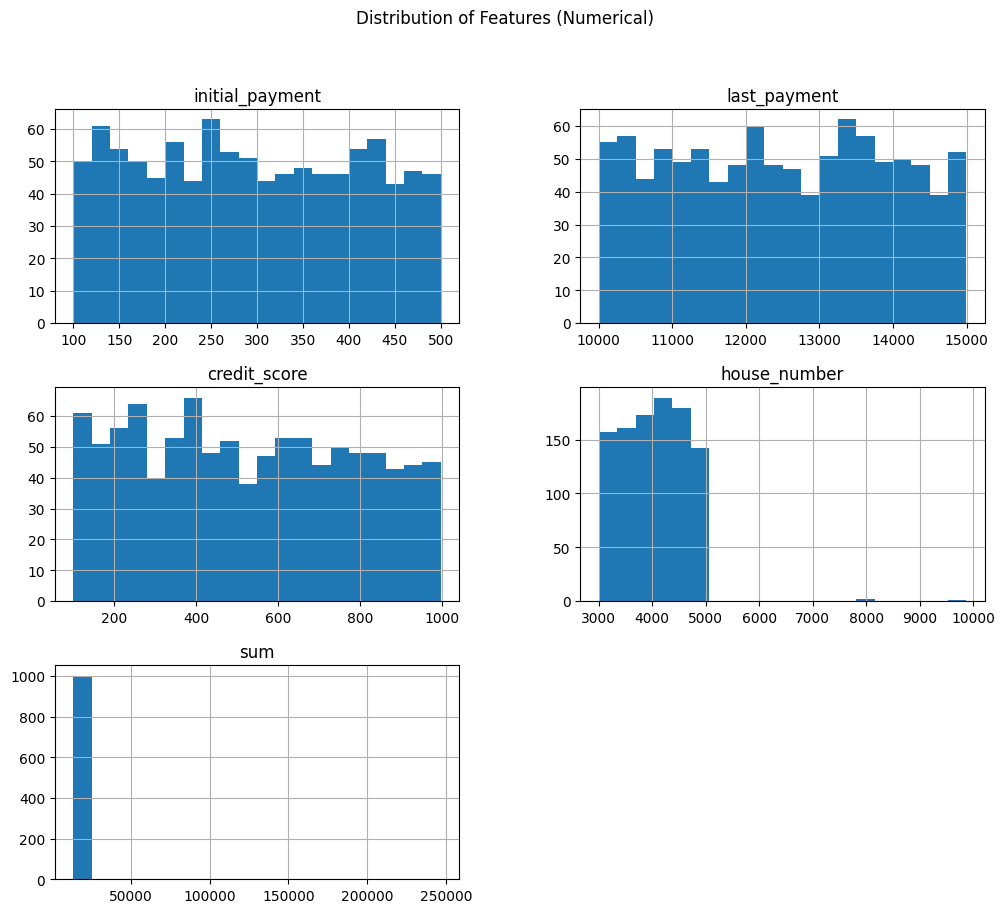

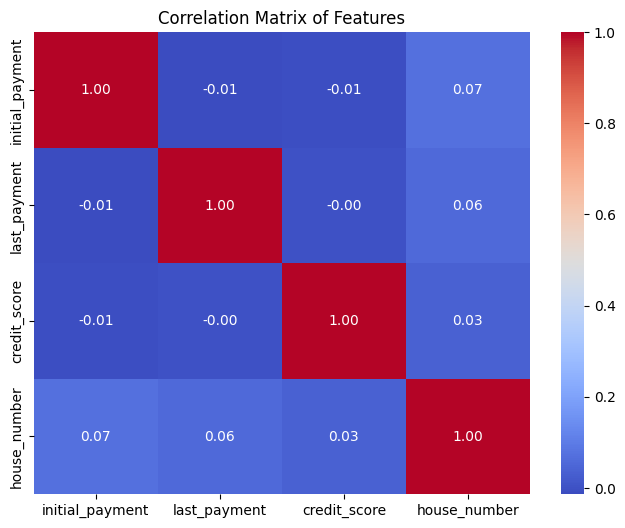

In [51]:
# distrubtion plots of the features
feature_cols = ['initial_payment', 'last_payment', 'credit_score', 'house_number', 'sum']

loans[feature_cols].hist(figsize = (12,10), bins = 20)
plt.suptitle('Distribution of Features (Numerical)')
plt.show()

# heatmap visualization
correlation = loans.drop('sum', axis = 1).corr(numeric_only = True) #dropped as its only the sum of other features
plt.figure(figsize = (8,6))
sb.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix of Features')
plt.show()


In [73]:
# checking for missing values
print(loans.isnull().sum())

# since there are no missing values no changes are needed to fix there
# encoding yes to 1 and no to 0 (positive class and negative class)
#loans['result'] = loans['result'].map({'yes':1, 'no':0})

# features that are going to be used for the model
X = loans.drop(['result', 'sum'], axis = 1) # results was dropped as thats the target variable and sum was dropped as thats the result of 2 features
y = loans['result'].map({'yes':1,'No':0}) #target variable of the dataset

# split, train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(y.isnull().sum())

initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64
0


In [74]:
# Initialization of the decision tree classifier 
loans_classifier = DecisionTreeClassifier(random_state = 42)

#fitting the model
loans_classifier.fit(X_train_scaled, y_train)

#predictions from the model using the test set
y_pred = loans_classifier.predict(X_test_scaled)
print(y_pred)

[0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0
 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1]


In [75]:
#accuracy calculations
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")

#classification report
print(" --- Classification Report --- ")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9104

 --- Classification Report --- 
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       107
           1       0.89      0.93      0.91        94

    accuracy                           0.91       201
   macro avg       0.91      0.91      0.91       201
weighted avg       0.91      0.91      0.91       201



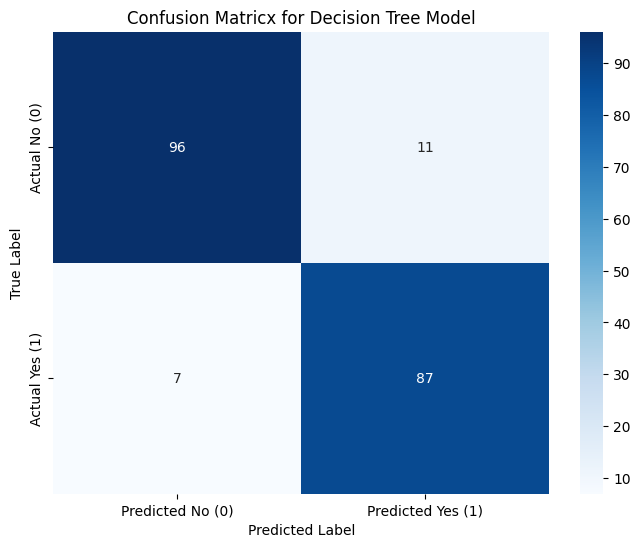

In [76]:
# Confusion matrix and plotting it
cm = confusion_matrix(y_test, y_pred)

# confusion matrix plot
plt.figure(figsize = (8,6))
sb.heatmap(cm, annot = True, fmt='d', cmap = 'Blues', xticklabels = ['Predicted No (0)', 'Predicted Yes (1)'], yticklabels = ['Actual No (0)', 'Actual Yes (1)'])
plt.title('Confusion Matricx for Decision Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

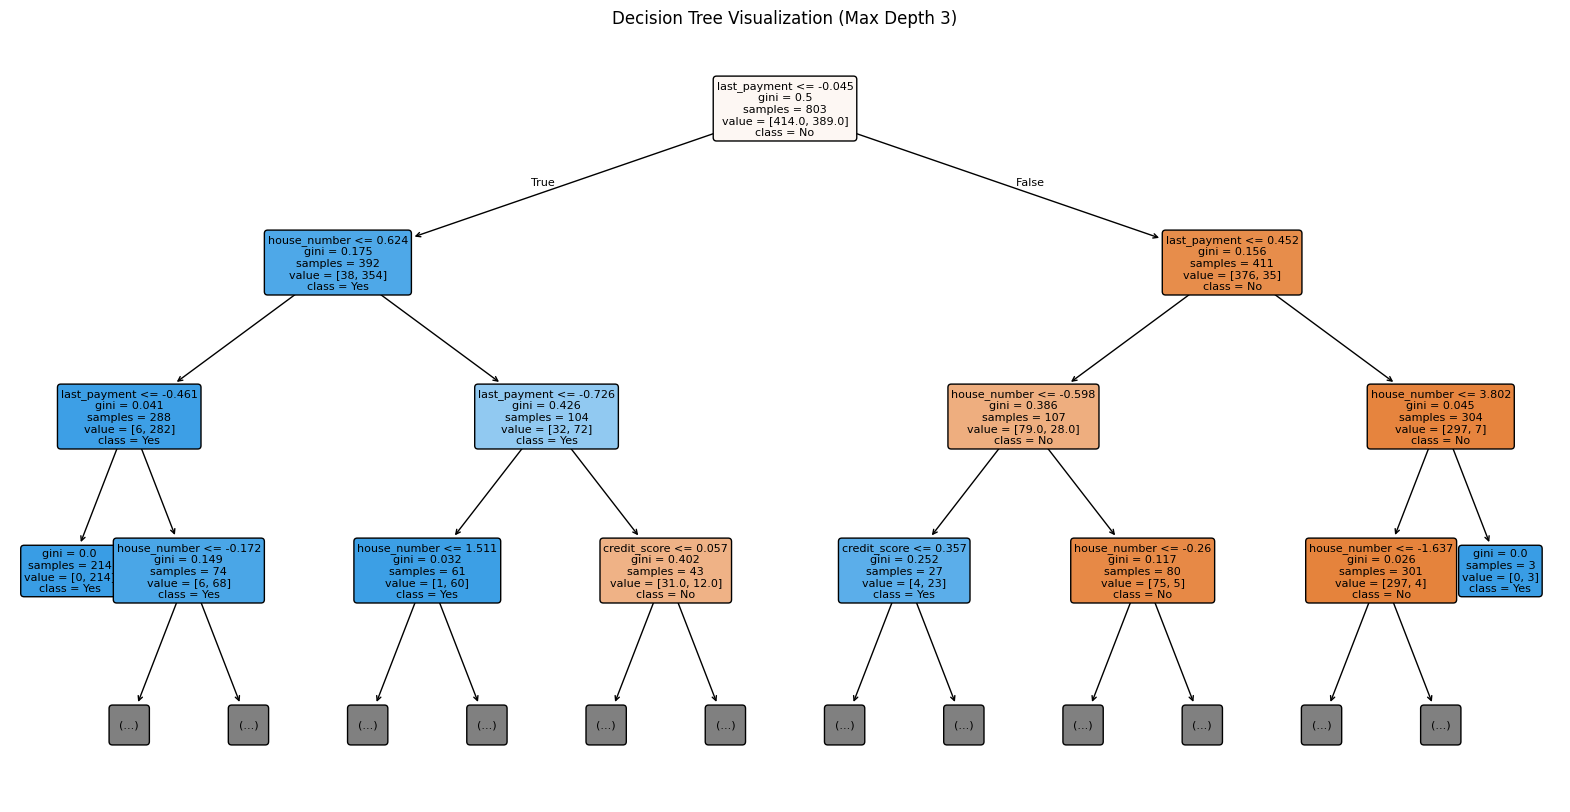

In [79]:
# Plot of the decision tree used for the model

from sklearn.tree import plot_tree

# Plot the trained Decision Tree (shows the logic of the model)
plt.figure(figsize=(20, 10))
plot_tree(loans_classifier,
          feature_names=X.columns.tolist(),
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3) # Limit depth for a readable plot
plt.title('Decision Tree Visualization (Max Depth 3)')
plt.show()